### Problem statement -
The World Happiness Report, a comprehensive survey assessing global happiness levels and contributing factors, presents an opportunity for in-depth analysis. Leveraging data of years: 2018 and 2019, this study aims to investigate country-specific happiness scores, shifts in rankings, and the impact social support, life expectancy, freedom, absence of corruption, and generosity on overall happiness. The goal is to uncover trends, variations, and potential correlations between these factors, contributing to a comprehensive understanding of happiness dynamics worldwide.

### Objective -
Train different Regression models on the dataset and observe which model performs best on the dataset based on several metrics

- [Load and Check Data](#-1)
- [Data Preparation](#0)
- [Simple Linear Regression](#1)
- [Ridge Regression](#4)
- [Lasso Regression](#5)
- [ElasticNet Regression](#6)
- [Random Forest Regression](#7)
- [Desision Tree Regression](#8)
- [Gradient Bossting Regressor](#9)

In [ ]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-whitegrid")
import warnings
warnings.filterwarnings("ignore")

<ipython-input-1-b97db42298a2>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


# Load and Check Data <a id="-1"></a>

In [ ]:
# loading dataset --> concatenation is done to make dataset diverse and big
y_2018 = pd.read_csv("/content/2018.csv");
y_2019 = pd.read_csv("/content/2019.csv");

data = pd.concat([y_2018,y_2019],sort=False)
data

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


# Variable Description

1. Overall rank: Ranking of countries by happiness level
2. Country or region: Country or region names
3. Score: Happiness scores
4. GDP per capita: Value representing the country's income and expense levels
5. Social support: Reflects the strength of interpersonal connections and support networks within a society.
6. Healthy life expectancy: Represents the average expected lifespan in good health.
7. Freedom to make life choices: Measures individual autonomy in decision-making.
8. Generosity: Reflects willingness to help and contribute.
9. Perceptions of corruption: Indicates trust in government and institutional integrity.

Note -
 * all the values are scaled between 0-10 except overall rank
 * Scaling the values between 0 and 1 or 0 and 10 ensures that different metrics or factors, such as GDP per capita, social support, or perceptions of corruption, are on a similar scale.
 * This makes it easier to compare the impact of each factor on the overall happiness or well-being score.

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,312.0,78.500000,45.104737,1.000,39.75000,78.5000,117.25000,156.000
Score,312.0,5.391506,1.114631,2.853,4.51425,5.3795,6.17600,7.769
GDP per capita,312.0,0.898298,0.394592,0.000,0.60950,0.9600,1.21950,2.096
Social support,312.0,1.211026,0.300310,0.000,1.05575,1.2655,1.45750,1.644
Healthy life expectancy,312.0,0.661295,0.252724,0.000,0.48825,0.6990,0.85800,1.141
Freedom to make life choices,312.0,0.423538,0.156024,0.000,0.32250,0.4495,0.54025,0.724
Generosity,312.0,0.182926,0.096739,0.000,0.10875,0.1755,0.24500,0.598
Perceptions of corruption,311.0,0.111299,0.095365,0.000,0.05000,0.0820,0.14050,0.457


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Score                         312 non-null    float64
 3   GDP per capita                312 non-null    float64
 4   Social support                312 non-null    float64
 5   Healthy life expectancy       312 non-null    float64
 6   Freedom to make life choices  312 non-null    float64
 7   Generosity                    312 non-null    float64
 8   Perceptions of corruption     311 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 24.4+ KB


Let's change the column names for convenience.

In [ ]:
data.rename(columns={
    "Overall rank": "rank",
    "Country or region": "country",
    "Score": "score",
    "GDP per capita": "gdp",
    "Social support": "social",
    "Healthy life expectancy": "healthy",
    "Freedom to make life choices": "freedom",
    "Generosity": "generosity",
    "Perceptions of corruption": "corruption"
},inplace=True)
del data["rank"]

# Missing Value

In [ ]:
# null value found in column named "corruption"
data.columns[data.isnull().any()]

Index(['corruption'], dtype='object')

There are empty elements in only one column. Let's look at how many.

In [ ]:
# one empty element in "corruption" column
data.isnull().sum()

country       0
score         0
gdp           0
social        0
healthy       0
freedom       0
generosity    0
corruption    1
dtype: int64

In [ ]:
# 1 NaN value
data[data["corruption"].isnull()]

,country,score,gdp,social,healthy,freedom,generosity,corruption
19,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [ ]:
# filling NaN value with mean of column
avg_data_corruption = data[data["score"] > 6.774].mean().corruption
data.loc[data["corruption"].isnull(),["corruption"]] = avg_data_corruption
data[data["corruption"].isnull()]

,country,score,gdp,social,healthy,freedom,generosity,corruption


# Data Preparation <a id="0"></a>
## Inconsistent Observation
* 95% of a machine learning model is said to be preprocessing and 5% is model selection. For this we need to teach the data to the model correctly. In order to prepare the available data for machine learning, we must apply certain pre-processing methods. One of these methods is the analysis of outliers. The outlier is any data point that is substantially different from the rest of the observations in a data set. In other words, it is the observation that goes far beyond the general trend.

![](https://miro.medium.com/max/854/1*RW-vfIbKZh-UGsLfTAWpyw.png)

Outlier values behave differently from other data models and they increase the error with overfitting, so the outlier model must be detected and some operations must be performed on it.
### 1.Using Box Graph
We can see contradictory observations with many visualization techniques. One of them is the box chart. If there is an outlier, this is drawn as the point, but the other population is grouped together and displayed in boxes.

In [ ]:
df = data.copy()
df = df.select_dtypes(include=["float64","int64"])
df.head()

,score,gdp,social,healthy,freedom,generosity,corruption
0,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,7.487,1.420,1.549,0.927,0.660,0.256,0.357


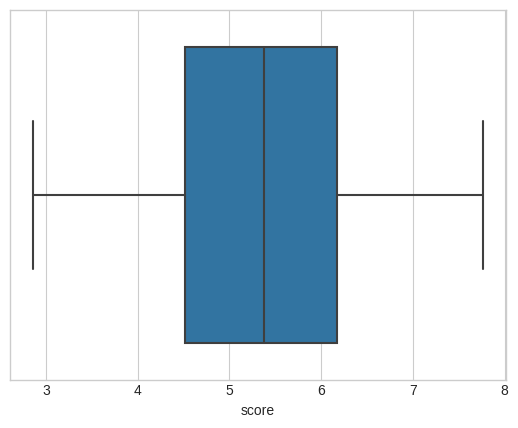

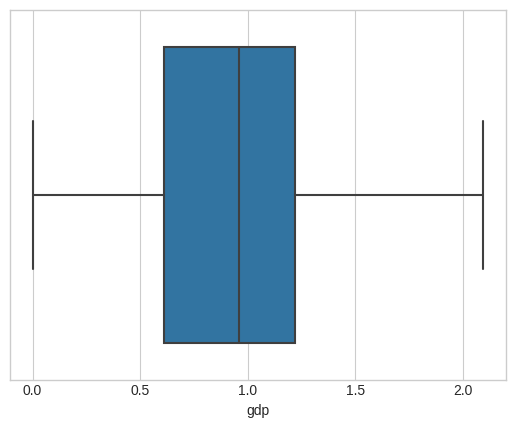

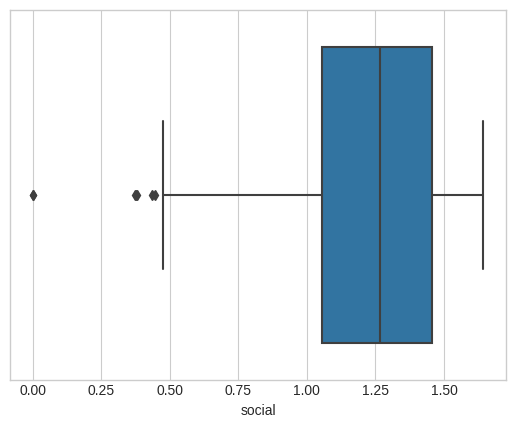

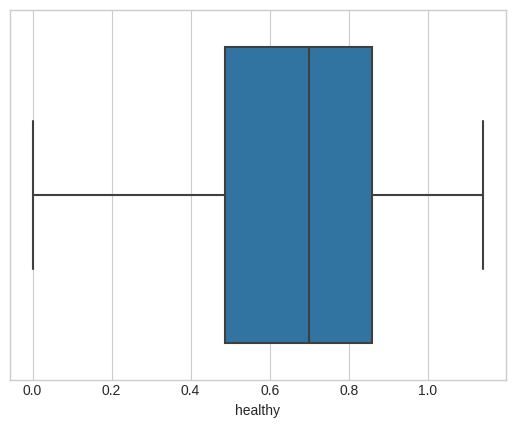

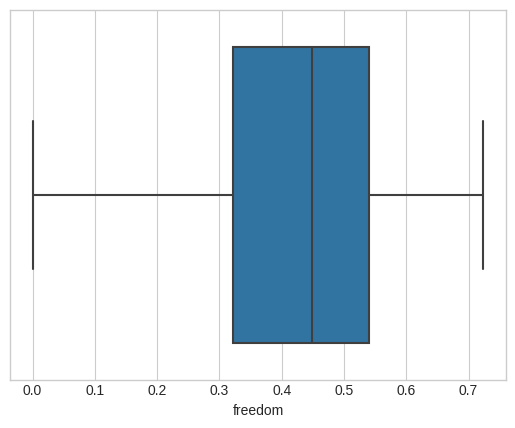

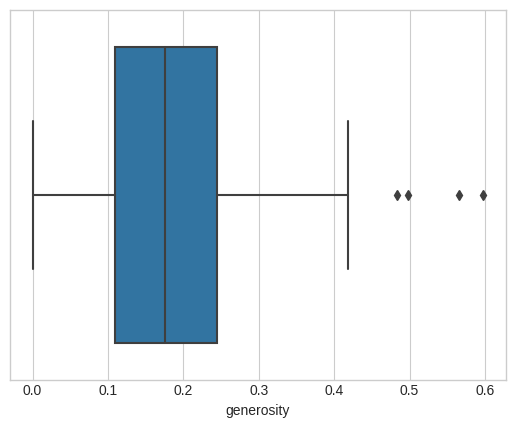

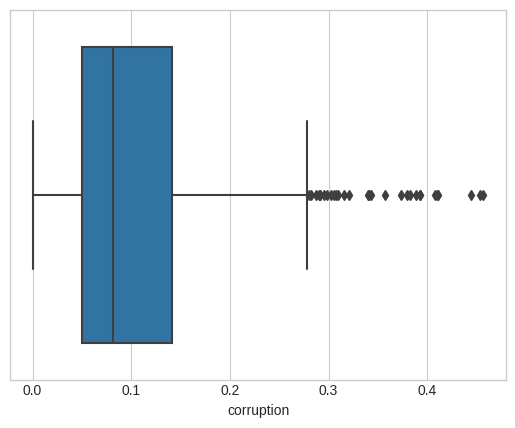

In [ ]:
# outliers are visible in "social","generosity","corruption" column
column_list = ["score","gdp","social","healthy","freedom","generosity","corruption"]
for col in column_list:
    sns.boxplot(x = df[col])
    plt.xlabel(col)
    plt.show()

We have observed that there are outliers in the "social","generosity" and "corruption" column. This may cause us to negatively affect us while training our data set.

In [ ]:
# for corruption
df_table = df["corruption"]

Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("lower bound is " + str(lower_bound))
print("upper bound is " + str(upper_bound))
print("Q1: ", Q1)
print("Q3: ", Q3)

lower bound is -0.08687499999999997
upper bound is 0.27812499999999996
Q1:  0.05
Q3:  0.14125


In [ ]:
outliers_vector = (df_table < (lower_bound)) | (df_table > (upper_bound))
outliers_vector

0       True
1       True
2       True
3      False
4       True
       ...  
151     True
152    False
153    False
154    False
155    False
Name: corruption, Length: 312, dtype: bool

In [ ]:
outliers_vector = df_table[outliers_vector]
outliers_vector.index.values

array([  0,   1,   2,   4,   5,   6,   7,   8,   9,  13,  14,  16,  33,
        75,  97, 150,   0,   1,   2,   4,   5,   6,   7,   8,  10,  13,
        15,  33,  75, 151])

Deleting data is not suitable for this data set. That's why we will fill out the outliers with the average.

In [ ]:
df_table = data.copy()
df_table["corruption"].iloc[outliers_vector.index.values] = df_table["corruption"].mean()
df_table["corruption"].iloc[outliers_vector.index.values]

0      0.111794
1      0.111794
2      0.111794
4      0.111794
5      0.111794
6      0.111794
7      0.111794
8      0.111794
9      0.111794
13     0.111794
14     0.111794
16     0.111794
33     0.111794
75     0.111794
97     0.111794
150    0.111794
0      0.111794
1      0.111794
2      0.111794
4      0.111794
5      0.111794
6      0.111794
7      0.111794
8      0.111794
10     0.111794
13     0.111794
15     0.111794
33     0.111794
75     0.111794
151    0.111794
Name: corruption, dtype: float64

In [ ]:
data = df_table

# Simple Linear Regressions <a id="1"></a>
Simple linear regression is a statistical method that allows us to summarize and analyze the relationships between two continuous (quantitative) variables:

## score - gdp
Firstly let's observe the relationship between gdp and score with the help of graphics.
* independent variable : x
* dependent variable : y

In [ ]:
from sklearn.linear_model import LinearRegression

X = data[["gdp"]]
X.head

<bound method NDFrame.head of        gdp
0    1.305
1    1.456
2    1.351
3    1.343
4    1.420
..     ...
151  0.359
152  0.476
153  0.350
154  0.026
155  0.306

[312 rows x 1 columns]>

In [ ]:
y = data[["score"]]
y.head

<bound method NDFrame.head of      score
0    7.632
1    7.594
2    7.555
3    7.495
4    7.487
..     ...
151  3.334
152  3.231
153  3.203
154  3.083
155  2.853

[312 rows x 1 columns]>

### Simple Linear Regression - Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Assuming X and y are defined as in your previous code snippet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
reg = LinearRegression()
model = reg.fit(X,y)
print("intercept: ", model.intercept_)
print("coef: ", model.coef_)
print("rscore. ", model.score(X,y))

intercept:  [3.36665334]
coef:  [[2.25409931]]
rscore.  0.6367680251195654


### Simple Linear Regression - Prediction

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Assuming X and y are defined as in your previous code snippet
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Training error
y_pred_train = lr_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

In [ ]:
print("Train Predictions:", y_pred_train[0:10])
print("Actual Train Values:", y_train[0:10].values)
print("Train RMSE:", train_rmse)

# Cross-validated RMSE
cv_rmse = np.sqrt(np.mean(-cross_val_score(lr_model, X_train, y_train, cv=20, scoring="neg_mean_squared_error")))
print("Cross-Validated RMSE:", cv_rmse)

Train Predictions: [[5.42901505]
 [6.03369208]
 [5.65437439]
 [5.97791006]
 [5.96005982]
 [5.71238768]
 [5.93551573]
 [5.68114975]
 [6.35276519]
 [6.51564867]]
Actual Train Values: [[4.586]
 [5.94 ]
 [3.59 ]
 [6.07 ]
 [5.358]
 [5.208]
 [5.79 ]
 [5.191]
 [7.328]
 [6.375]]
Train RMSE: 0.6854405490898692
Cross-Validated RMSE: 0.690808252826769


In [ ]:
# Test error
y_pred_test = lr_model.predict(X_test)
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test Error:", test_rmse_lr)

Test Error: 0.6092820511542772


# Ridge Regression <a id="4"></a>
The aim is to find the coefficients that minimize the sum of error squares by applying a penalty to these coefficients.
* It is resistant to over learning.
* It is biased but its variance is low.
* It is better than OLS when there are too many parameters.
* Builds a model with all variables. It does not exclude the unrelated variables from the model, it approximates its coefficients to zero.

![](https://i.ibb.co/2SJtqyB/Ek-A-klama-2020-04-21-202339.jpg)

* The delta parameter that gives the smallest "cross validation" value is selected.
* With this delta selected, the model is fit for observations again.

## Ridge Regression - Model

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import RidgeCV

In [ ]:
X = df.drop("score",axis=1)
y = df["score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=0.1).fit(X_train, y_train)
ridge_model

Ridge(alpha=0.1)

In [ ]:
ridge_model.coef_

array([0.94225637, 1.02043421, 0.93689001, 1.44712035, 0.35979844,
       0.97107389])

An alpha value will be assigned with each coefficient. Error coefficients will be examined according to these values.

In [ ]:
ridge_model.intercept_

1.9108156265652152

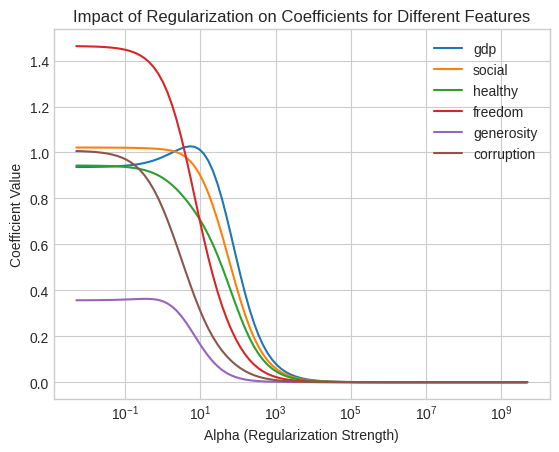

In [ ]:
# x axis - alpha values used for regularization in Ridge Regression --> Range (10^-1 to 10^9)
# y axis - coefficient values for feature
# different lines denote coefficients releated to different features
# graph helps find impact of regularization , overfitting and underfitting

#coefficient decrease as alpha values decrease
lambdas = 10**np.linspace(10, -2, 100) * 0.5  # Alpha values for regularization
ridge_model = Ridge()
coefs = []

for i in lambdas:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train, y_train)
    coefs.append(ridge_model.coef_)

ax = plt.gca()

# Plotting each coefficient separately with a label for the feature
for feature_index in range(len(X_train.columns)):
    ax.plot(lambdas, [coef[feature_index] for coef in coefs], label=X_train.columns[feature_index])

ax.set_xscale("log")
ax.legend()  # Show the legend with labels for each feature
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Impact of Regularization on Coefficients for Different Features')
plt.show()


In contrast to the different beta values, the changes in the coefficients of the variables in our data set appear in the graph above. As can be seen, as the coefficients increase, it approaches zero.

## Ridge Regression - Prediction

In [ ]:
ridge_model = Ridge().fit(X_train,y_train)

y_pred = ridge_model.predict(X_train)

print("predict: ", y_pred[0:10])
print("real: ", y_train[0:10].values)

predict:  [5.05318836 5.79071673 5.37059901 5.75868845 5.33588452 5.47787414
 5.95562654 5.72047349 6.84044342 6.15987674]
real:  [4.586 5.94  3.59  6.07  5.358 5.208 5.79  5.191 7.328 6.375]


In [ ]:
RMSE = np.mean(mean_squared_error(y_train,y_pred)) # rmse = square root of the mean of error squares
print("train error: ", RMSE)

train error:  0.28067189344529464


In [ ]:
Verified_RMSE = np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv=20, scoring="neg_mean_squared_error")))
print("Verified_RMSE: ", Verified_RMSE)

Verified_RMSE:  0.5410728899647692


There are two values ​​above. One of them is unverified, the other is the values ​​that represent the square root of the sum of the verified error squares. As you can see, the unverified value is almost half of the verified value. This result shows us that it is more correct to use the second method, not the first method, while taking the square root of the mean of the error squares.

## Ridge Model - Model Tuning

In [ ]:
# using different values to find optimal solution --> hit and trial
ridge_model = Ridge(10).fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.5102254754869215

In [ ]:
ridge_model = Ridge(30).fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.5983602488673112

In [ ]:
ridge_model = Ridge(90).fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.7710248515673939

We can find out which value will work better by trial and error. But with the method we will use below, we can find the most appropriate value more easily and quickly.

In [ ]:
# helps to find optimal alpha value
lambdas1 = 10**np.linspace(10,-2,100)
lambdas2 = np.random.randint(0,1000,100)

ridgeCV = RidgeCV(alphas = lambdas1,scoring = "neg_mean_squared_error", cv=10)
ridgeCV.fit(X_train,y_train)

RidgeCV(alphas=array([1.00000000e+10, 7.56463328e+09, 5.72236766e+09, 4.32876128e+09,
       3.27454916e+09, 2.47707636e+09, 1.87381742e+09, 1.41747416e+09,
       1.07226722e+09, 8.11130831e+08, 6.13590727e+08, 4.64158883e+08,
       3.51119173e+08, 2.65608778e+08, 2.00923300e+08, 1.51991108e+08,
       1.14975700e+08, 8.69749003e+07, 6.57933225e+07, 4.97702356e+07,
       3.76493581e+07, 2.84803587e+0...
       6.13590727e+00, 4.64158883e+00, 3.51119173e+00, 2.65608778e+00,
       2.00923300e+00, 1.51991108e+00, 1.14975700e+00, 8.69749003e-01,
       6.57933225e-01, 4.97702356e-01, 3.76493581e-01, 2.84803587e-01,
       2.15443469e-01, 1.62975083e-01, 1.23284674e-01, 9.32603347e-02,
       7.05480231e-02, 5.33669923e-02, 4.03701726e-02, 3.05385551e-02,
       2.31012970e-02, 1.74752840e-02, 1.32194115e-02, 1.00000000e-02]),
        cv=10, scoring='neg_mean_squared_error')

We can use alpha_ feature to attract the most appropriate value.

In [ ]:
ridgeCV.alpha_

5.809444972801581

In [ ]:
# final model
ridge_tuned = Ridge(alpha = ridgeCV.alpha_).fit(X_train,y_train)
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.49071831136749977

In [ ]:
# for lambdas2
lambdas2 = np.random.uniform(0.001, 1000, 100)  # Generating random alpha values between 0.001 and 1000

ridgeCV = RidgeCV(alphas=lambdas2, scoring="neg_mean_squared_error", cv=10)
ridgeCV.fit(X_train, y_train)
ridge_tuned = Ridge(alpha=ridgeCV.alpha_).fit(X_train, y_train)
y_pred = ridge_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5094875481557936

# Lasso Regression <a id="5"></a>
The aim is to find the coefficients that minimize the sum of error squares by applying a penalty to these coefficients.
* Lasso regression = L1
* Ridge regression = L2

* It has been proposed to eliminate the disadvantage of leaving the related-unrelated variables in the model of the Ridge regression.
* Coefficients near zero in Lasso.
* But when the L1 norm is big enough in lambda, some coefficients make it zero. Thus, it makes the selection of the variable.
* It is very important to choose Lambda correctly, CV is used here too.
* Ridge and Lasso methods are not superior to each other.

## Lasso Regression - Model

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV, LassoCV

In [ ]:
X = df.drop("score",axis=1)
y = df["score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

lasso_model = Lasso().fit(X_train,y_train)

In [ ]:
print("intercept: ", lasso_model.intercept_)
print("coef: ", lasso_model.coef_)

intercept:  5.346196172248804
coef:  [0. 0. 0. 0. 0. 0.]


In [ ]:
# coefficients for different lambda values

alphas = np.random.randint(0,10000,10)
lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

## Lasso Regression - Prediction

In [ ]:
lasso_model

Lasso()

In [ ]:
lasso_model.predict(X_train)[0:5]

array([5.34619617, 5.34619617, 5.34619617, 5.34619617, 5.34619617])

In [ ]:
lasso_model.predict(X_test)[0:5]

array([5.34619617, 5.34619617, 5.34619617, 5.34619617, 5.34619617])

In [ ]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1.1087763155347463

In [ ]:
r2_score(y_test,y_pred)

-0.015561293164185974

## Lasso Regression - Model Tuning

In [ ]:
# finding optimal alpha value
lasso_cv_model = LassoCV(cv=10,max_iter=100000).fit(X_train,y_train)
lasso_cv_model

LassoCV(cv=10, max_iter=100000)

In [ ]:
lasso_cv_model.alpha_

0.0026847466799991312

In [ ]:
lasso_tuned = Lasso().set_params(alpha= lasso_cv_model.alpha_).fit(X_train,y_train)
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0.5394427335399019

# ElasticNet Regression <a id="6"></a>
* The aim is to find the coefficients that minimize the sum of error squares by applying a penalty.
* ElasticNet combines L1 and L2 approaches.The aim is to find the coefficients that minimize the sum of error squares by applying a penalty.

## ElasticNet Regression - Model & Prediction

In [ ]:
# Required Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

In [ ]:
X = df.drop("score",axis=1)
y = df["score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

enet_model = ElasticNet().fit(X_train,y_train)

In [ ]:
enet_model.coef_

array([0., 0., 0., 0., 0., 0.])

In [ ]:
enet_model.intercept_

5.346196172248804

In [ ]:
# prediction
enet_model.predict(X_train)[0:10]

array([5.34619617, 5.34619617, 5.34619617, 5.34619617, 5.34619617,
       5.34619617, 5.34619617, 5.34619617, 5.34619617, 5.34619617])

In [ ]:
enet_model.predict(X_test)[0:10]

array([5.34619617, 5.34619617, 5.34619617, 5.34619617, 5.34619617,
       5.34619617, 5.34619617, 5.34619617, 5.34619617, 5.34619617])

In [ ]:
y_pred = enet_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1.1087763155347463

### ElasticNet Regression - Fine Tuning

In [ ]:
from sklearn.linear_model import ElasticNet

# Hyperparameters to tune
param_grid_enet = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}


In [ ]:
# Initialize Elastic Net Regressor
enet_model = ElasticNet(random_state=42)
# Perform Randomized Search Cross Validation
from sklearn.model_selection import RandomizedSearchCV
enet_cv = RandomizedSearchCV(estimator=enet_model, param_distributions=param_grid_enet,
                             scoring='neg_mean_squared_error', cv=10, n_iter=10, random_state=42)
enet_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=ElasticNet(random_state=42),
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 1, 10],
                                        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
# Get the best hyperparameters
best_params_enet = enet_cv.best_params_
print("Best Hyperparameters:", best_params_enet)
# Train a final model using the best hyperparameters
best_enet_model = ElasticNet(**best_params_enet, random_state=42)
best_enet_model.fit(X_train, y_train)

Best Hyperparameters: {'l1_ratio': 0.1, 'alpha': 0.001}


ElasticNet(alpha=0.001, l1_ratio=0.1, random_state=42)

In [ ]:
# Predict using the tuned model
y_pred_enet = best_enet_model.predict(X_test)
test_rmse_enet = np.sqrt(mean_squared_error(y_test, y_pred_enet))
print("Test RMSE with Tuned Elastic Net Model:", test_rmse_enet)

Test RMSE with Tuned Elastic Net Model: 0.535453175642543


# Random Forest Regression <a id="6"></a>
* Random Forest Regression aims to minimize prediction errors by constructing an ensemble of decision trees. Instead of using a single tree, it aggregates multiple trees to make predictions.

* In essence, the Random Forest Regression minimizes prediction errors by aggregating the predictions from numerous trees. Each tree is trained on a random subset of the data and a random subset of features, reducing the risk of overfitting and increasing model robustness.

* While Random Forest doesn't involve coefficients like linear regression, it employs strategies like feature randomness and tree ensembling to mitigate overfitting and improve prediction accuracy. The model is geared towards reducing the variance without necessarily imposing explicit penalties as in L1 or L2 regularization

## Random Forest Regression - Model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
# Assuming X and y are defined as in your previous code snippet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Visualizing feature importances for different tree depths
max_depths = [2, 5, 10, 20, 50]  # Example list of tree depths to explore
feature_importances = []

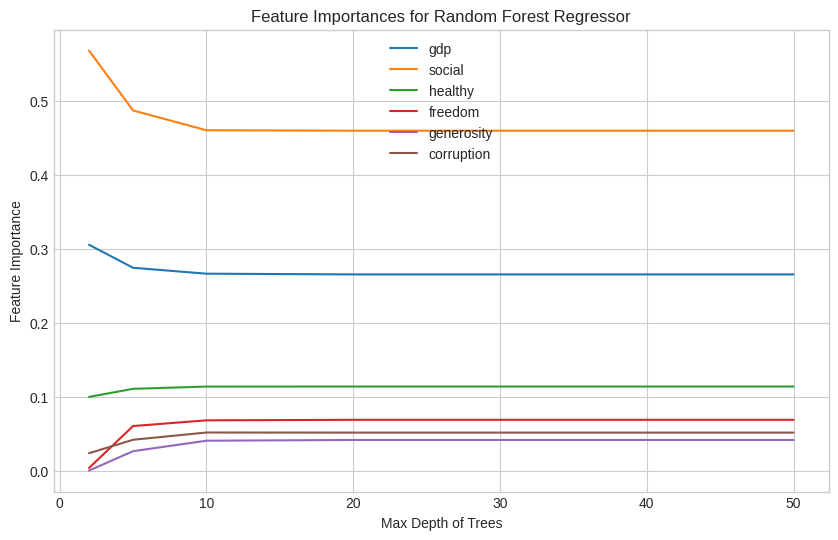

In [ ]:
# x axis - max depth of trees
# y axis - feature importance
# inference - after depth=10 the feature importance is being constant , this shows equal importance of features

for depth in max_depths:
    rf_model.set_params(max_depth=depth)
    rf_model.fit(X_train, y_train)
    feature_importances.append(rf_model.feature_importances_)

# Plotting feature importances against tree depths
plt.figure(figsize=(10, 6))
for i in range(len(X.columns)):
    plt.plot(max_depths, [importance[i] for importance in feature_importances], label=X.columns[i])

plt.xlabel('Max Depth of Trees')
plt.ylabel('Feature Importance')
plt.title('Feature Importances for Random Forest Regressor')
plt.legend()
plt.show()

### Random Forest Regression - Prediction

In [ ]:
# Assuming X and y are defined as in your previous code snippet
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Training error
y_pred_train = rf_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

print("Train Predictions:", y_pred_train[0:10])
print("Actual Train Values:", y_train[0:10].values)

Train Predictions: [4.63172 5.8506  4.04391 6.01553 5.36207 5.15139 5.86457 5.14742 7.23766
 6.33977]
Actual Train Values: [4.586 5.94  3.59  6.07  5.358 5.208 5.79  5.191 7.328 6.375]


In [ ]:
print("Train RMSE:", train_rmse)

# Cross-validated RMSE
cv_rmse = np.sqrt(np.mean(-cross_val_score(rf_model, X_train, y_train, cv=20, scoring="neg_mean_squared_error")))
print("Cross-Validated RMSE:", cv_rmse)


Train RMSE: 0.18013803973798095
Cross-Validated RMSE: 0.48359661929527


In [ ]:
# Test error
y_pred_test = rf_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test Error:", test_rmse)

Test Error: 0.41259771022454766


### Random Forest Regresssion - Model Tuning

In [ ]:
# Hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

In [ ]:
# Perform Randomized Search Cross Validation
from sklearn.model_selection import RandomizedSearchCV
rf_cv = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                           scoring='neg_mean_squared_error', cv=10, n_iter=10, random_state=42)
rf_cv.fit(X_train, y_train)

# Get the best hyperparameters
best_params = rf_cv.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


In [ ]:
# Train a final model using the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Predict using the tuned model
y_pred = best_rf_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE with Tuned Model:", test_rmse)

Test RMSE with Tuned Model: 0.4138045508515677


### Decision Tree Regression
* Decision Tree Regression predicts outcomes by structuring data into a tree-like flowchart, minimizing errors by segmenting data based on features.
* It forms decision rules at each node, recursively splitting data, capturing complex relationships, and offering interpretability without relying on coefficients.
* While powerful in learning intricate patterns, it's prone to overfitting, mitigated through techniques like limiting tree depth without explicit regularization penalties.

### Decison Tree Regression - Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# Assuming X and y are defined as in your previous code snippet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Visualizing feature importances for different tree depths
max_depths = [2, 5, 10, 20, 50]  # Example list of tree depths to explore
feature_importances = []
for depth in max_depths:
    tree_model.set_params(max_depth=depth)
    tree_model.fit(X_train, y_train)
    feature_importances.append(tree_model.feature_importances_)

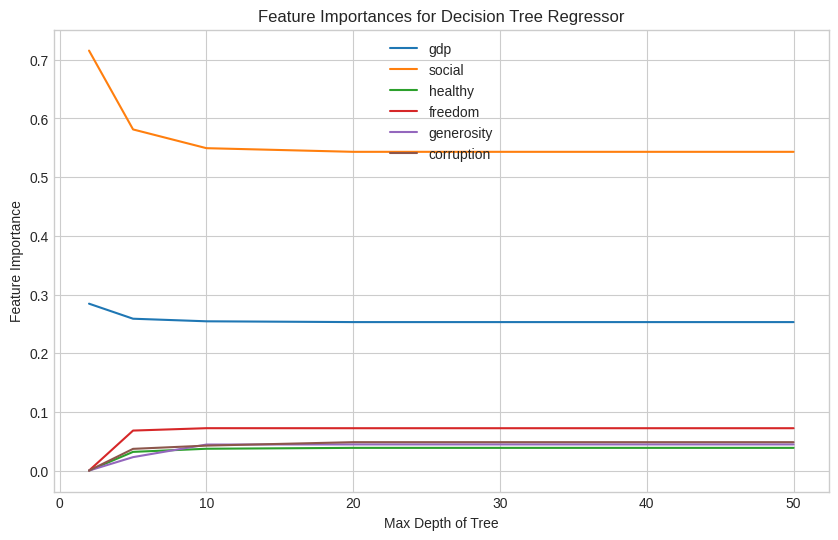

In [ ]:
# Plotting feature importances against tree depths
# Graph similar to random forest graph , here "generosity","corruption","healthy" are having similar feature importance
plt.figure(figsize=(10, 6))
for i in range(len(X.columns)):
    plt.plot(max_depths, [importance[i] for importance in feature_importances], label=X.columns[i])

plt.xlabel('Max Depth of Tree')
plt.ylabel('Feature Importance')
plt.title('Feature Importances for Decision Tree Regressor')
plt.legend()
plt.show()

### Decision Tree Regression - Prediction

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Assuming X and y are defined as in your previous code snippet
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred_train = tree_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

print("Train Predictions:", y_pred_train[0:10])
print("Actual Train Values:", y_train[0:10].values)

Train Predictions: [4.586 5.94  3.59  6.07  5.358 5.208 5.79  5.191 7.328 6.375]
Actual Train Values: [4.586 5.94  3.59  6.07  5.358 5.208 5.79  5.191 7.328 6.375]


In [ ]:
# Cross-validated RMSE
cv_rmse = np.sqrt(np.mean(-cross_val_score(tree_model, X_train, y_train, cv=20, scoring="neg_mean_squared_error")))
print("Cross-Validated RMSE:", cv_rmse)

Cross-Validated RMSE: 0.6563818436546575


In [ ]:
# Test error
y_pred_test = tree_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test Error:", test_rmse)

Test Error: 0.6118597852657068


### Decision Tree Regression - Model Tuning

In [ ]:
# Hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)

In [ ]:
# Perform Randomized Search Cross Validation
tree_cv = RandomizedSearchCV(estimator=tree_model, param_distributions=param_grid,
                             scoring='neg_mean_squared_error', cv=10, n_iter=10, random_state=42)
tree_cv.fit(X_train, y_train)

# Get the best hyperparameters
best_params = tree_cv.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 30}


In [ ]:
# Train a final model using the best hyperparameters
best_tree_model = DecisionTreeRegressor(**best_params, random_state=42)
best_tree_model.fit(X_train, y_train)

# Predict using the tuned model
y_pred = best_tree_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE with Tuned Model:", test_rmse)

Test RMSE with Tuned Model: 0.5416194525640005


### Gradient Boosting
* Gradient Boosting Regression reduces prediction errors by iteratively creating a series of decision trees, each correcting the errors of its predecessor, ultimately forming a robust ensemble model.
* It sequentially builds trees, focusing on areas where previous trees underperformed, combining their predictions to strengthen the overall model.
* Unlike linear regression, Gradient Boosting doesn't use explicit coefficients; instead, it optimizes by minimizing errors and iteratively improving predictions, employing ensemble learning to enhance accuracy without direct penalty-based regularization methods.*

### Gradient Boosting - Model

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming X and y are defined as in your previous code snippet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Visualizing feature importances for different max depths
max_depths = [2, 5, 10, 20, 50]  # Example list of max depths to explore
feature_importances = []
for depth in max_depths:
    gb_model.set_params(max_depth=depth)
    gb_model.fit(X_train, y_train)
    feature_importances.append(gb_model.feature_importances_)


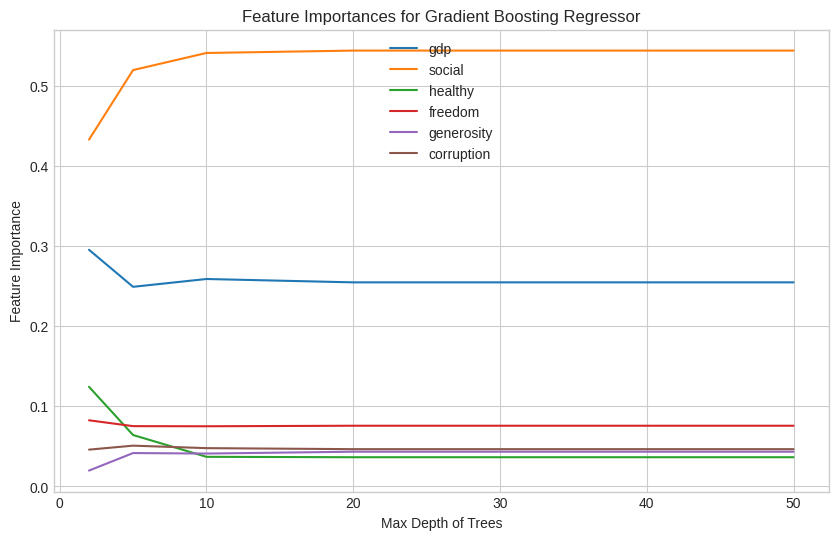

In [ ]:
# Plotting feature importances against max depths
# social has maximum feature importance followed by gdp and so on
plt.figure(figsize=(10, 6))
for i in range(len(X.columns)):
    plt.plot(max_depths, [importance[i] for importance in feature_importances], label=X.columns[i])

plt.xlabel('Max Depth of Trees')
plt.ylabel('Feature Importance')
plt.title('Feature Importances for Gradient Boosting Regressor')
plt.legend()
plt.show()

### Gradient Boosting - Prediction

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Assuming X and y are defined as in your previous code snippet
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Training error
y_pred_train = gb_model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))

print("Train Predictions:", y_pred_train[0:10])
print("Actual Train Values:", y_train[0:10].values)
print("Train RMSE:", train_rmse)

Train Predictions: [4.77894421 5.86448644 4.00861595 5.99005739 5.28981005 5.21557967
 5.96629443 5.21986788 7.24009611 6.21176751]
Actual Train Values: [4.586 5.94  3.59  6.07  5.358 5.208 5.79  5.191 7.328 6.375]
Train RMSE: 0.20259730335897624


In [ ]:
# Cross-validated RMSE
cv_rmse = np.sqrt(np.mean(-cross_val_score(gb_model, X_train, y_train, cv=20, scoring="neg_mean_squared_error")))
print("Cross-Validated RMSE:", cv_rmse)

# Test error
y_pred_test = gb_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test Error:", test_rmse)

Cross-Validated RMSE: 0.47519791258327043
Test Error: 0.46802317501342033


### Gradient Boosting - Fine Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

In [ ]:
# Perform Randomized Search Cross Validation
gb_cv = RandomizedSearchCV(estimator=gb_model, param_distributions=param_grid,
                           scoring='neg_mean_squared_error', cv=10, n_iter=10, random_state=42)
gb_cv.fit(X_train, y_train)

# Get the best hyperparameters
best_params = gb_cv.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}


In [ ]:
# Train a final model using the best hyperparameters
best_gb_model = GradientBoostingRegressor(**best_params, random_state=42)
best_gb_model.fit(X_train, y_train)

# Predict using the tuned model
y_pred = best_gb_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test RMSE with Tuned Model:", test_rmse)

Test RMSE with Tuned Model: 0.44922469391007486


### Conclusion
| Model | Test RSME | FIne Tuned Test RSME|
|----------|----------|----------|
| Simple Linear Regression | 0.68 |              |
| Ridge Regression | 0.54 | 0.51 |
| Lasso Regression | 1.1 | 0.53 |
| Elastic Net Regression | 1.1 | 0.53 |
| Random Forest Regression| 0.41 | 0.41
| Decision Tree Regression| 0.61 | 0.54  
| Gradient Boosting Regression| 0.46 | 0.44 |

* If performance of regression models is measured by RSME :
  
  Random Forest Regression model and Gradient Boost model perform best  